<a href="https://colab.research.google.com/github/DiegoF-G/Numpy/blob/main/numpy4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selecionando dados

In [24]:
import numpy as np
# diametro, peso e cores de laranjas e toranjas
url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'
dados = np.loadtxt(url, delimiter=',', usecols=np.arange(1,6,1), skiprows=1)

"""Selecionando diametro (coluna 0) e peso (coluna 1) das laranjas e toranjas,
   da linha 0 a 4999 são laranjas e o restante é das toranjas"""
diameter_orange, weight_orange = dados[:5000, 0], dados[:5000, 1]
diameter_grapefruit, weight_grapefruit = dados[5000:, 0], dados[5000:, 1]
print(f'{diameter_orange}\n{weight_orange}\n\n{diameter_grapefruit}\n{weight_grapefruit}')


[ 2.96  3.91  4.42 ... 12.55 12.75 12.87]
[ 86.76  88.05  95.17 ... 218.07 230.13 231.09]

[ 7.63  7.69  7.72 ... 15.59 15.92 16.45]
[126.79 133.98 135.56 ... 256.5  260.14 261.51]


# Números (pseudo-)aleatórios
Vamos usar o gerador do Numpy de números aleatórios para escolher um bom coeficiente angular de retas que se aproximam dos dados de pesos e diametros das laranjas e toranjas, assim obtendo um modelo razoável para prever esses dados.

O valor do coeficiente linear será assumido como 33 para laranjas e 17 para as toranjas, com base em tentativa e erro por gráficos. Usarei a semente fixa 84 para gerar os números aleatórios.


In [25]:
def plot_pseudo_lr(diameters, weights, name, angular_coef, linear_coef):
  import matplotlib.pyplot as plt
  plt.plot(diameters, weights)
  plt.plot(diameters, angular_coef*diameters + linear_coef)
  plt.title('Weight by Diameter')
  plt.xlabel('Diameter')
  plt.ylabel('Weight')
  plt.legend([f'{name}', f'LR {name}'])


Best norm for oranges: 77.09133678123224
Best angular coef. for oranges: 14.183989666826182


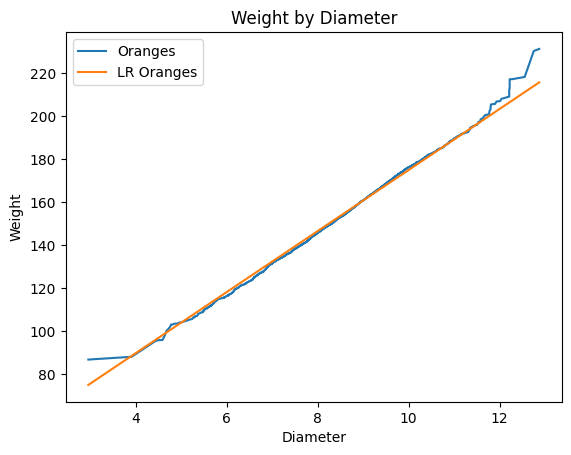

In [26]:
# Laranjas

b_orange = 33
Xo = diameter_orange
Yo = weight_orange
np.random.seed(84)

angular_coefs = np.random.uniform(10, 20, 100)

norms = np.array([])
for i in range(100):
  norms = np.append(norms, np.linalg.norm(Yo - (angular_coefs[i]*Xo + b_orange)))

a_orange = angular_coefs[norms == np.min(norms)][0]

# A melhor norma e coeficiente angular para as laranjas
norm_coef = (print(f'Best norm for oranges: {np.min(norms)}'), print(f'Best angular coef. for oranges: {a_orange}'))

# Reta resultante
plot_pseudo_lr(Xo, Yo, 'Oranges', a_orange, b_orange)


Best norm for grapefruits: 49.09406252575345
Best angular coef. for grapefruits: 15.73458544108796


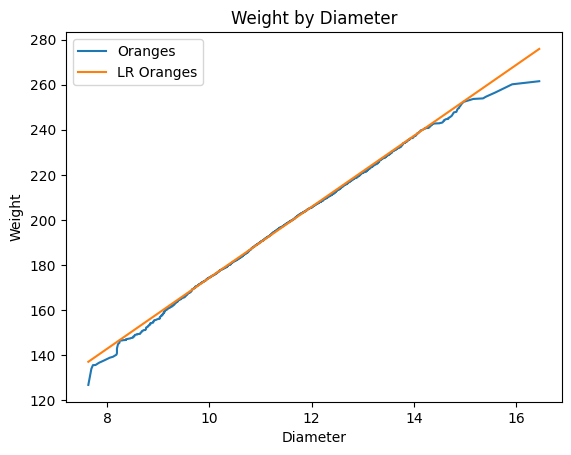

In [27]:
# Toranjas

b_grapefruit = 17
Xg = diameter_grapefruit
Yg = weight_grapefruit
np.random.seed(84)

angular_coefs = np.random.uniform(10, 20, 100)

norms = np.array([])
for i in range(100):
  norms = np.append(norms, np.linalg.norm(Yg - (angular_coefs[i]*Xg + b_grapefruit)))

a_grapefruit = angular_coefs[norms == np.min(norms)][0]

# A melhor norma e coeficiente angular para as toranjas
norm_coef = (print(f'Best norm for grapefruits: {np.min(norms)}'), print(f'Best angular coef. for grapefruits: {a_grapefruit}'))

# Reta resultante
plot_pseudo_lr(Xg, Yg, 'Oranges', a_grapefruit, b_grapefruit)
